In [1]:
import cv2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
model = load_model('mask_detector_dummy2.model')
import numpy as np
from imutils import paths
from sklearn.metrics import classification_report
from imutils import paths


In [15]:
data = []
imagePaths = list(paths.list_images(r'C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask'))
testY1=np.zeros((len(imagePaths),1))

imagePaths2 = list(paths.list_images(r'C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask'))
testY2=np.ones((len(imagePaths2),1))

imagePaths.extend(imagePaths2)
testY=np.concatenate([testY1,testY2])
for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image,(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	data.append(image)
data = np.array(data, dtype="float32")
data.shape

(5167, 224, 224, 3)

In [16]:
predIdxs = model.predict(data)
predIdxs = np.argmax(predIdxs, axis=1)
#testY=np.ones((data.shape[0],1))


In [17]:
print(classification_report(testY, predIdxs))
from sklearn.metrics import confusion_matrix
confusion_matrix(testY, predIdxs)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2826
         1.0       0.99      1.00      0.99      2341

    accuracy                           0.99      5167
   macro avg       0.99      1.00      0.99      5167
weighted avg       0.99      0.99      0.99      5167



array([[2809,   17],
       [   9, 2332]], dtype=int64)

0.9950699596986909
[0.         0.00601557 1.        ]
[0.         0.99615549 1.        ]


Text(0, 0.5, 'True Positive Rate')

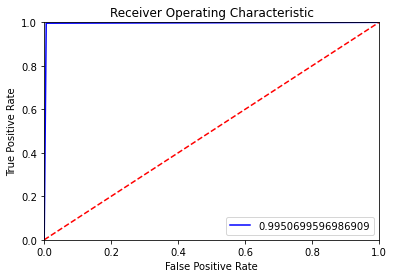

In [19]:
from sklearn import metrics
fpr, tpr,z = metrics.roc_curve(testY, predIdxs)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

(0.0, 1.0)

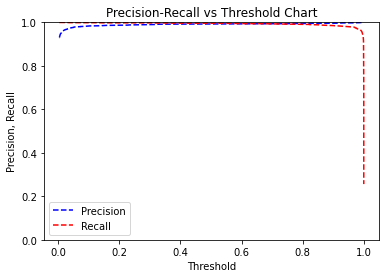

In [25]:
from sklearn.metrics import precision_recall_curve
#probs = model.predict(data)
#preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(testY, preds)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1]) 

In [6]:
imagePaths = list(paths.list_images(r'C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask'))
for i,j in enumerate(imagePaths):
    if testY[i]!= predIdxs[i]:
        print(j)

C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\03d95ab894.jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\0_0_zhangzhenyue_0065.jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\11111471.png
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\138.jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\192.jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\316.jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\410.jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\426.jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\without_mask\ec4da1adfa.jpg


In [10]:
data = []
imagePaths = list(paths.list_images(r'C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask'))
for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image,(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	data.append(image)
data = np.array(data, dtype="float32")
data.shape

KeyboardInterrupt: 

In [ ]:
predIdxs = model.predict(data)
predIdxs = np.argmax(predIdxs, axis=1)
testY=np.zeros((data.shape[0],1))
print(classification_report(testY, predIdxs))
print(confusion_matrix(testY, predIdxs))

In [9]:
imagePaths = list(paths.list_images(r'C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask'))
for i,j in enumerate(imagePaths):
    if testY[i]!= predIdxs[i]:
        print(j)

C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (1209).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (1298).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (13).jpeg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (1549).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (1643).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (1749).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (21).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (2124).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (2368).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (2399).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (2416).jpg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (57).jpeg
C:\Users\Deepak\cv2\pyimage\face-mask-detector\dataset\with_mask\0 (

In [8]:
data = []
imagePaths = list(paths.list_images(r'C:\Users\Deepak\Desktop\resume\New folder'))
for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image,(224, 224))
	window_name = 'image'
	cv2.imshow(window_name,image)
	cv2.waitKey(0)
	image = img_to_array(image)
	image = preprocess_input(image)
	data.append(image)
data = np.array(data, dtype="float32")


In [9]:
predIdxs = model.predict(data)
print(predIdxs)
predIdxs = np.argmax(predIdxs, axis=1)
if (predIdxs==0):
    print('Mask')
else:
    print('No Mask')

[[0.9988236  0.00117635]]
Mask


In [27]:
a=2
if a==1:
    print(1)
else:
    if a==2:
        print(2)

2


In [8]:
import cv2
import keras
import numpy as np
from keras.preprocessing import image
from PIL import Image

def prepare_image (file):
    im_resized = image.load_img(file, target_size = (224,224))
    img_array = image.img_to_array(im_resized)
    image_array_expanded = np.expand_dims(img_array, axis = 0)
    return keras.applications.mobilenet.preprocess_input(image_array_expanded)

# execute the function
PIL_image = prepare_image (r'C:\Users\Deepak\Desktop\resume\New folder\0_0_1 copy 23.jpg')

In [9]:
def prepare_image2 (img):
    # convert the color from BGR to RGB then convert to PIL array
    cvt_image =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(cvt_image)

    # resize the array (image) then PIL image
    im_resized = im_pil.resize((224, 224))
    img_array = image.img_to_array(im_resized)
    image_array_expanded = np.expand_dims(img_array, axis = 0)
    return keras.applications.mobilenet.preprocess_input(image_array_expanded)

# execute the function
img = cv2.imread(r'C:\Users\Deepak\Desktop\resume\New folder\0_0_1 copy 23.jpg')
cv2_image = prepare_image2 (img)

# finally check if it is working  
np.array_equal(PIL_image, cv2_image)

False

In [4]:
PIL_image

array([[[[-0.52156866, -0.5686275 , -0.69411767],
         [-0.52156866, -0.5686275 , -0.69411767],
         [-0.52156866, -0.5686275 , -0.69411767],
         ...,
         [-0.85882354, -0.94509804, -0.9607843 ],
         [-0.85882354, -0.94509804, -0.9607843 ],
         [-0.85882354, -0.94509804, -0.9607843 ]],

        [[-0.52156866, -0.5686275 , -0.69411767],
         [-0.52156866, -0.5686275 , -0.69411767],
         [-0.52156866, -0.5686275 , -0.69411767],
         ...,
         [-0.85882354, -0.94509804, -0.9607843 ],
         [-0.85882354, -0.94509804, -0.9607843 ],
         [-0.85882354, -0.94509804, -0.9607843 ]],

        [[-0.52156866, -0.5686275 , -0.69411767],
         [-0.52156866, -0.5686275 , -0.69411767],
         [-0.52156866, -0.5686275 , -0.69411767],
         ...,
         [-0.85882354, -0.94509804, -0.9607843 ],
         [-0.85882354, -0.94509804, -0.9607843 ],
         [-0.85882354, -0.94509804, -0.9607843 ]],

        ...,

        [[-0.90588236, -0.94509804, -0

In [5]:
cv2_image

array([[[[-0.52156866, -0.5686275 , -0.6784314 ],
         [-0.52156866, -0.5686275 , -0.6784314 ],
         [-0.52156866, -0.5686275 , -0.6784314 ],
         ...,
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ]],

        [[-0.52156866, -0.5686275 , -0.6784314 ],
         [-0.52156866, -0.5686275 , -0.6784314 ],
         [-0.52156866, -0.5686275 , -0.6784314 ],
         ...,
         [-0.85882354, -0.94509804, -0.9764706 ],
         [-0.85882354, -0.94509804, -0.9764706 ],
         [-0.85882354, -0.94509804, -0.9764706 ]],

        [[-0.52156866, -0.5686275 , -0.6784314 ],
         [-0.52156866, -0.5686275 , -0.6784314 ],
         [-0.52156866, -0.5686275 , -0.6784314 ],
         ...,
         [-0.8509804 , -0.9372549 , -0.96862745],
         [-0.8509804 , -0.9372549 , -0.96862745],
         [-0.8509804 , -0.9372549 , -0.96862745]],

        ...,

        [[-0.92156863, -0.9529412 , -0